<a href="https://colab.research.google.com/github/jyothirmai318/Data-Analysis/blob/main/Data_Analysis_OneWayANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One-way analysis of Varience(anova).

A field study in which three fertilizers are tested and we want to compare their efficiency. Each fertilizer is used to grow ten plots and, then, the crops are harvested.
#####yield_1 = np.array([6.27, 5.36, 6.39, 4.85, 5.99, 7.14, 5.08, 4.07, 4.35, 4.95])
yield_2 = np.array([3.07, 3.29, 4.04, 4.19, 3.41, 3.75, 4.87, 3.94, 6.28, 3.15])
#####yield_3 = np.array([4.04, 3.79, 4.56, 4.55, 4.53, 3.53, 3.71, 7.00, 4.61, 4.55])

### 1. Importing all the required libraries.

In [ ]:
import numpy as np
from scipy.special import beta
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
yield_1 = np.array([6.27, 5.36, 6.39, 4.85, 5.99, 7.14, 5.08, 4.07, 4.35, 4.95])
yield_2 = np.array([3.07, 3.29, 4.04, 4.19, 3.41, 3.75, 4.87, 3.94, 6.28, 3.15])
yield_3 = np.array([4.04, 3.79, 4.56, 4.55, 4.53, 3.53, 3.71, 7.00, 4.61, 4.55])
yields = np.stack([yield_1, yield_2, yield_3], axis=0)

###2. Visualizing the data to identify differences between each group.

In [ ]:
n, (a, n_i) = yields.size, yields.shape
print(f"There are {a} groups with {n_i} samples each for a total of {n} samples.")
grand_mean, group_means = yields.mean(), yields.mean(1)

There are 3 groups with 10 samples each for a total of 30 samples.


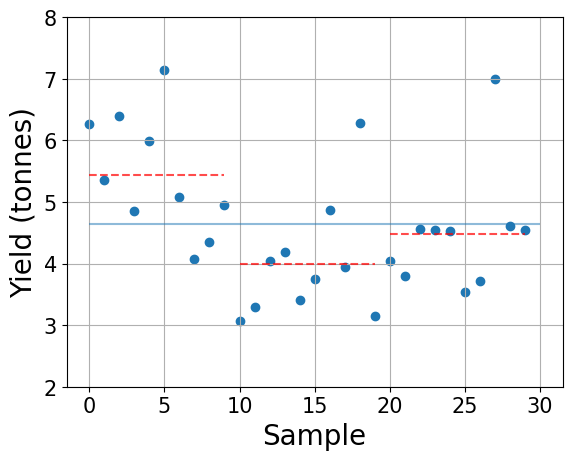

In [ ]:
#collapse-hide
x = np.arange(n)
plt.plot(figsize=(6, 4))
plt.scatter(x, yields.ravel())
plt.hlines(grand_mean, 0, n, alpha=0.5)
for i, m in enumerate(group_means):
    plt.hlines(m, x[n_i*i], x[n_i*(i+1)-1], colors='r', linestyles='--', alpha=0.7)
plt.grid()
plt.ylim(2, 8)
plt.tick_params(labelsize=15)
plt.ylabel("Yield (tonnes)", fontsize=20)
plt.xlabel("Sample", fontsize=20);

###3. Calculating F-ratio.

In [ ]:
def f_distribution(x, d_b, d_w):
    "F-distribution given `d_b` between DF and `d_w` within DF."
    return (d_b/d_w)**(d_b/2)*x**(d_b/2-1)*(1+x*d_b/d_w)**(-(d_b+d_w)/2)/beta(d_b/2, d_w/2)

In [ ]:
ss_within = np.sum((yields - group_means[:, None])**2)
ss_between = np.sum(n_i*(group_means - grand_mean)**2)
df_within, df_between = n - a, a - 1
ms_within, ms_between = ss_within/df_within, ss_between/df_between
f_ratio = ms_between/ms_within
print(f"F-ratio of {f_ratio:.4f}.")

F-ratio of 5.7024.


###4. Calculating p-value of this f-ratio for the given degrees of freedom.

To construct the p-value, we have to check what is the probability that the F-ratio is equal or larger to the obtained value under the null hypothesis.

In [ ]:
fs = np.linspace(f_ratio, 100, 1000)
prob = f_distribution(fs, df_between, df_within)
p_value = np.trapz(prob, x=fs)
print(f"p-value {p_value:.4f}")

p-value 0.0086


The obtained p-value is significantly lower than the typical $0.05$ threshold, so we can accept the hypothesis that there are significant differences between fertilizers.

##Analysis


For the dataset, I considered three different fertilizers and their efficiency. Libraries like numpy, matplotlib and scipy are used to perform the code execution. Numpy is a python library that is used to perform calculations. It is used for arrays and makes it easy to perform operations using arrays. Matplotlib is a visualisation library which can be used to analyse the data with various charts like bar graph, scatter plot etc. scipy is a similar library like numpy but has advanced operations. Then I performed some statistics metrics and a visualisation to understand how the data is and how similar the groups are. After that I performed F-ratio and P-value which are major metrics in ANOVA. The f ratio value tells us if there is any difference between two or more groups. The p value is a probability value between 0 and 1. If it lies below the threshold, the null hypothesis is rejected

####Question 1:
Calculating the mean of each yield, grouped mean and standard deviations of the yields for the case study given above.

In [ ]:
mean_yield1 = yield_1.mean()
print("Mean of Yield 1:", mean_yield1)
mean_yield2 = yield_2.mean()
print("Mean of Yield 2:", mean_yield2)
mean_yield3 = yield_3.mean()
print("Mean of Yield 3:", mean_yield3)

std_yield1 = yield_1.std()
print("Standard Deviation of Yield 1:", std_yield1)
std_yield2 = yield_2.std()
print("Standard Deviation of Yield 2:", std_yield2)
std_yield3 = yield_3.std()
print("Standard Deviation of Yield 3:", std_yield3)

grouped_mean = yields.mean()
print("Grouped Mean:", grouped_mean)
grouped_std = yields.std()
print("Grouped Standard Deviation:", grouped_std)

Mean of Yield 1: 5.445
Mean of Yield 2: 3.999
Mean of Yield 3: 4.487
Standard Deviation of Yield 1: 0.9258968625068343
Standard Deviation of Yield 2: 0.9218833982668309
Standard Deviation of Yield 3: 0.9246950848793346
Grouped Mean: 4.643666666666666
Grouped Standard Deviation: 1.1021932175843259


####Question 2:
Calculating the ratio of the largest to the smallest standard deviations for the provided data.

In [ ]:
max_std = max(std_yield1, std_yield2, std_yield3)
min_std = min(std_yield1, std_yield2, std_yield3)
ratio = max_std/min_std
print("Ratio of Largest to Smallest Standard Deviation:", ratio)

Ratio of Largest to Smallest Standard Deviation: 1.0043535486673791


####Question 3:
Calculating the mean of each yield, grouped mean and standard deviations of the yields for the case study I have choosen.

In [ ]:
#Data
yield_1 = np.array([7.12, 5.45, 6.55, 5.98, 6.34, 7.67, 5.21, 4.89, 4.73, 5.26])
yield_2 = np.array([4.11, 4.39, 4.97, 5.23, 4.55, 4.92, 5.65, 5.08, 6.72, 4.47])
yield_3 = np.array([5.67, 4.87, 5.44, 5.34, 5.21, 4.67, 4.91, 6.55, 5.11, 5.08])
yields = np.stack([yield_1, yield_2, yield_3], axis=0)
mean_yield1 = yield_1.mean()
print("Mean of Yield 1:", mean_yield1)
mean_yield2 = yield_2.mean()
print("Mean of Yield 2:", mean_yield2)
mean_yield3 = yield_3.mean()
print("Mean of Yield 3:", mean_yield3)

std_yield1 = yield_1.std()
print("Standard Deviation of Yield 1:", std_yield1)
std_yield2 = yield_2.std()
print("Standard Deviation of Yield 2:", std_yield2)
std_yield3 = yield_3.std()
print("Standard Deviation of Yield 3:", std_yield3)

grouped_mean = yields.mean()
print("Grouped Mean:", grouped_mean)
grouped_std = yields.std()
print("Grouped Standard Deviation:", grouped_std)

Mean of Yield 1: 5.92
Mean of Yield 2: 5.0089999999999995
Mean of Yield 3: 5.284999999999999
Standard Deviation of Yield 1: 0.9336487562247379
Standard Deviation of Yield 2: 0.7137429509284138
Standard Deviation of Yield 3: 0.504465063210526
Grouped Mean: 5.404666666666667
Grouped Standard Deviation: 0.8310745387081048


####Question 4:
Also calculating the ratio of the largest to the smallest standard deviations.

In [ ]:
max_std = max(std_yield1, std_yield2, std_yield3)
min_std = min(std_yield1, std_yield2, std_yield3)
ratio = max_std/min_std
print("Ratio of Largest to Smallest Standard Deviation:", ratio)

Ratio of Largest to Smallest Standard Deviation: 1.8507699032372886


One-way ANOVA assumes that the data within each group is normally distributed. If the data is not normally distributed, the results may not be accurate. This is  significant in small sample numbers, because it influences the test results.  If the group variances fluctuate, the test can get distorted, resulting in inaccurate findings about group differences.
The dataset's observations need to distinguish from one another. Therefore, it is not appropriate to compare the data points from one group to those from another.




##Implementping one-way anova for the following two questions given below using f_oneway() function from SciPy library .
###Question 1:
Researchers took 20 cars of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.
#####performance1 = [89, 89, 88, 78, 79]
#####performance2 = [93, 92, 94, 89, 88]
#####performance3 = [89, 88, 89, 93, 90]
#####performance4 = [81, 78, 81, 92, 82]

In [ ]:
from scipy.stats import f_oneway
#Data
performance1=[89, 89, 88, 78, 79]
performance2=[93, 92, 94, 89, 88]
performance3=[89, 88, 89, 93, 90]
performance4=[81, 78, 81, 92, 82]

f_ratio,p_value=f_oneway(performance1, performance2, performance3, performance4)
print(f"F-ratio:",f_ratio)
print(f"p-value:",p_value)

F-ratio: 4.625000000000002
p-value: 0.016336459839780215


From the F-ratio and P-Value, since the p-value is less than the threshold 0.05, we accept the null hypothesis. That is the performance of different engine oils is very different from each other.



###Question 2:
Suppose we want to know whether or not three different exam prep programs lead to different mean scores on a certain exam. To test this, we recruit 30 students to participate in a study and split them into three groups.

The students in each group are randomly assigned to use one of the three exam prep programs for the next three weeks to prepare for an exam. At the end of the three weeks, all of the students take the same exam.

The exam scores for each group are shown below:
#####Sample 1=[85,86,88,75,78,94,98,79,71,70]
#####Sample 2=[91,92,93,85,87,84,82,88,95,96]
#####Sample 3=[79,78,88,94,92,85,83,85,82,81]

In [ ]:
#Data
Sample1=[85,86,88,75,78,94,98,79,71,70]
Sample2=[91,92,93,85,87,84,82,88,95,96]
Sample3=[79,78,88,94,92,85,83,85,82,81]

f_ratio,p_value=f_oneway(Sample1,Sample2,Sample3)
print(f"F-ratio:",f_ratio)
print(f"p-value:",p_value)

F-ratio: 2.6479421579532807
p-value: 0.08910947313817302


From the F-ratio and P-Value, since the p-value is less than the threshold 0.05, we accept the null hypothesis. That is the exam scores for different groups are very different from each othe.

The following code is to print the anova table that contains 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'. The following code is based on the provided dataset "Students.csv".
The dataset consists of 8239 rows, each of them representing a particular student, and 16 columns (stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary), each of them corresponding to a feature related to that particular student.


The task is to find is there any evidence of a significant difference in average annual salary for graduates of different study subjects at 5% significance level? There are 6 different study subjects.
1. Data Exploration and Preparation.

In [ ]:
import pandas as pd
import random

# read original dataset
student_df = pd.read_csv('students-1.csv')

# filter the students who are graduated
graduated_student_df = student_df[student_df['graduated'] == 1]

# random sample for 500 students
unique_student_id = list(graduated_student_df['stud.id'].unique())
random.seed(30) # set a seed so that everytime we will extract same sample
sample_student_id = random.sample(unique_student_id, 500)
sample_df = graduated_student_df[graduated_student_df['stud.id'].isin(sample_student_id)].reset_index(drop=True)

# two variables of interest
sample_df = sample_df[['major', 'salary']]
groups = sample_df.groupby('major').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups


,major,salary
0,Biology,87
1,Economics and Finance,94
2,Environmental Sciences,97
3,Mathematics and Statistics,75
4,Political Science,84
5,Social Sciences,63


2. Normality assumption check.
Here we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled before we perform the hypothesis test.

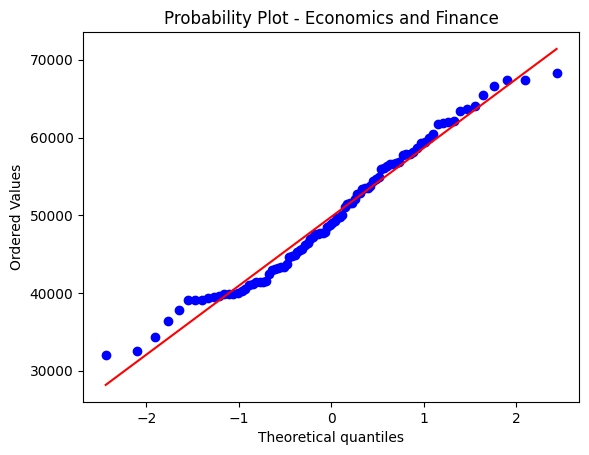

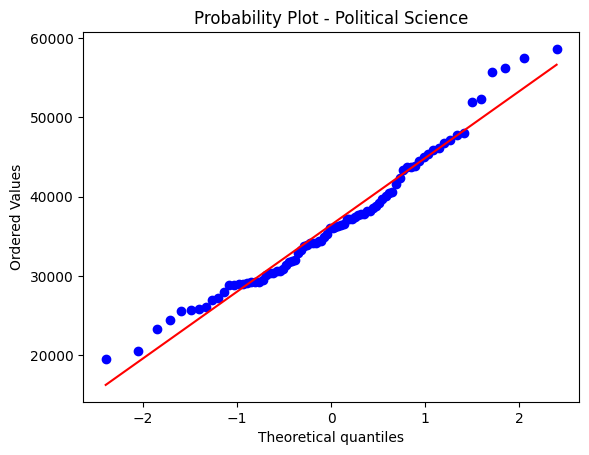

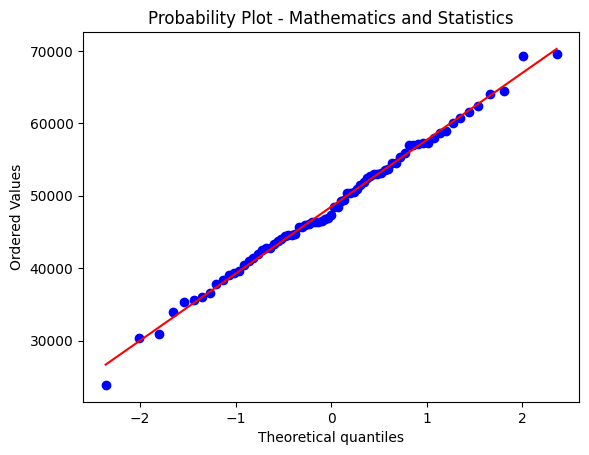

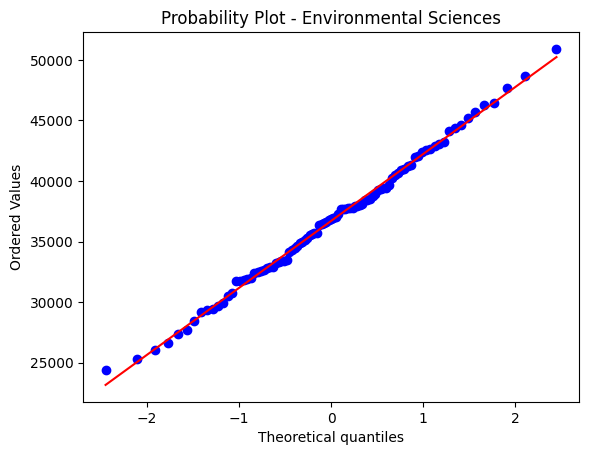

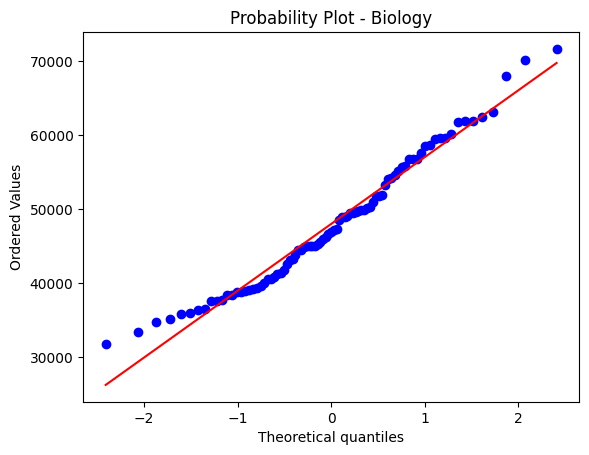

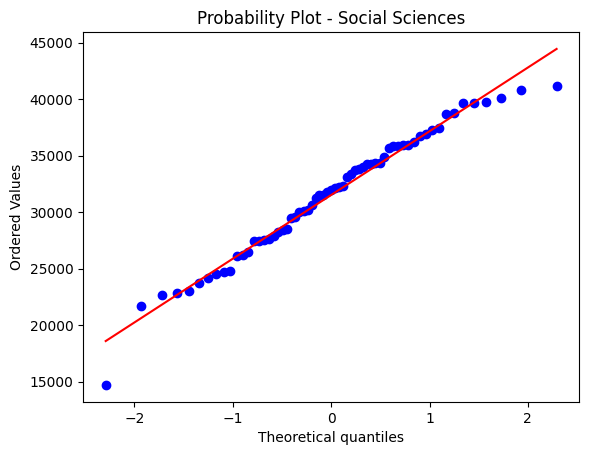

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['major'].unique()
for major in unique_majors:
    stats.probplot(sample_df[sample_df['major'] == major]['salary'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

3. Calculating the ratio of the largest to the smallest standard deviations.

In [ ]:
ratio = sample_df.groupby('major').std().max() / sample_df.groupby('major').std().min()
ratio

,0
salary,1.669921


4. Creating Anova table.

In [ ]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1
print(anova_table)



                                     SS   df MS F P-value F crit
Source of Variation                                             
Between Groups       24184075535.074078    5                    
Within Groups        30867423591.219269  494                    
Total                 55051499126.29335  499                    



We considered a dataset which has the information about students with their respective majors and salaries. I created a random sample with 500 rows, this is done so that data sampling helps making the statistic calculations faster and efficient. The required attributes are considered like the major and their salary of only graduated students. Visualisation graphs are done to understand how the data is and how it can be used for the ANOVA table. The required metrics like grouped mean and standard deviation is calculated and with the formulas, an ANOVA table is generated.

Analysing the above code to calculate the MeanSquare, F-ratio, P-valu3, f-critical and print the anova table.

In [ ]:
anova_table['MS']['Between Groups'] = anova_table['SS']['Between Groups'] / anova_table['df']['Between Groups']
anova_table['MS']['Within Groups'] = anova_table['SS']['Within Groups'] / anova_table['df']['Within Groups']
anova_table['F']['Between Groups'] = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
fs= np.linspace(anova_table['F']['Between Groups'],100,100)
prob = f_distribution(fs, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
anova_table['P-value']['Between Groups'] = np.trapz(prob, x=fs)

threshold = 0.05
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-threshold,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
print(anova_table)

                                     SS   df                 MS          F  \
Source of Variation                                                          
Between Groups       24184075535.074078    5  4836815107.014815  77.408037   
Within Groups        30867423591.219269  494     62484663.14012              
Total                 55051499126.29335  499                                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.232261  
Within Groups                          
Total                                  
